<a href="https://colab.research.google.com/github/Mathvivas/Artificial-Intelligence/blob/main/AI_BearTypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading Images to Use in a Model

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import cv2
from google.colab.patches import cv2_imshow
from bing_image_downloader import downloader

In [31]:
bear_types = 'grizzly bear', 'black bear', 'teddy bear'
directory = '/content/drive/MyDrive/Colab Notebooks/Dados/bears'

In [32]:
def download_bear(bear_type):
    downloader.download(bear_type, limit=160,  output_dir=directory, 
                    adult_filter_off=True, force_replace=False, 
                    timeout=60, verbose=True)

In [33]:
# Run this code once, next time, comment it out and run the entire notebook

# %%capture
# for bear in bear_types:
#     download_bear(bear)

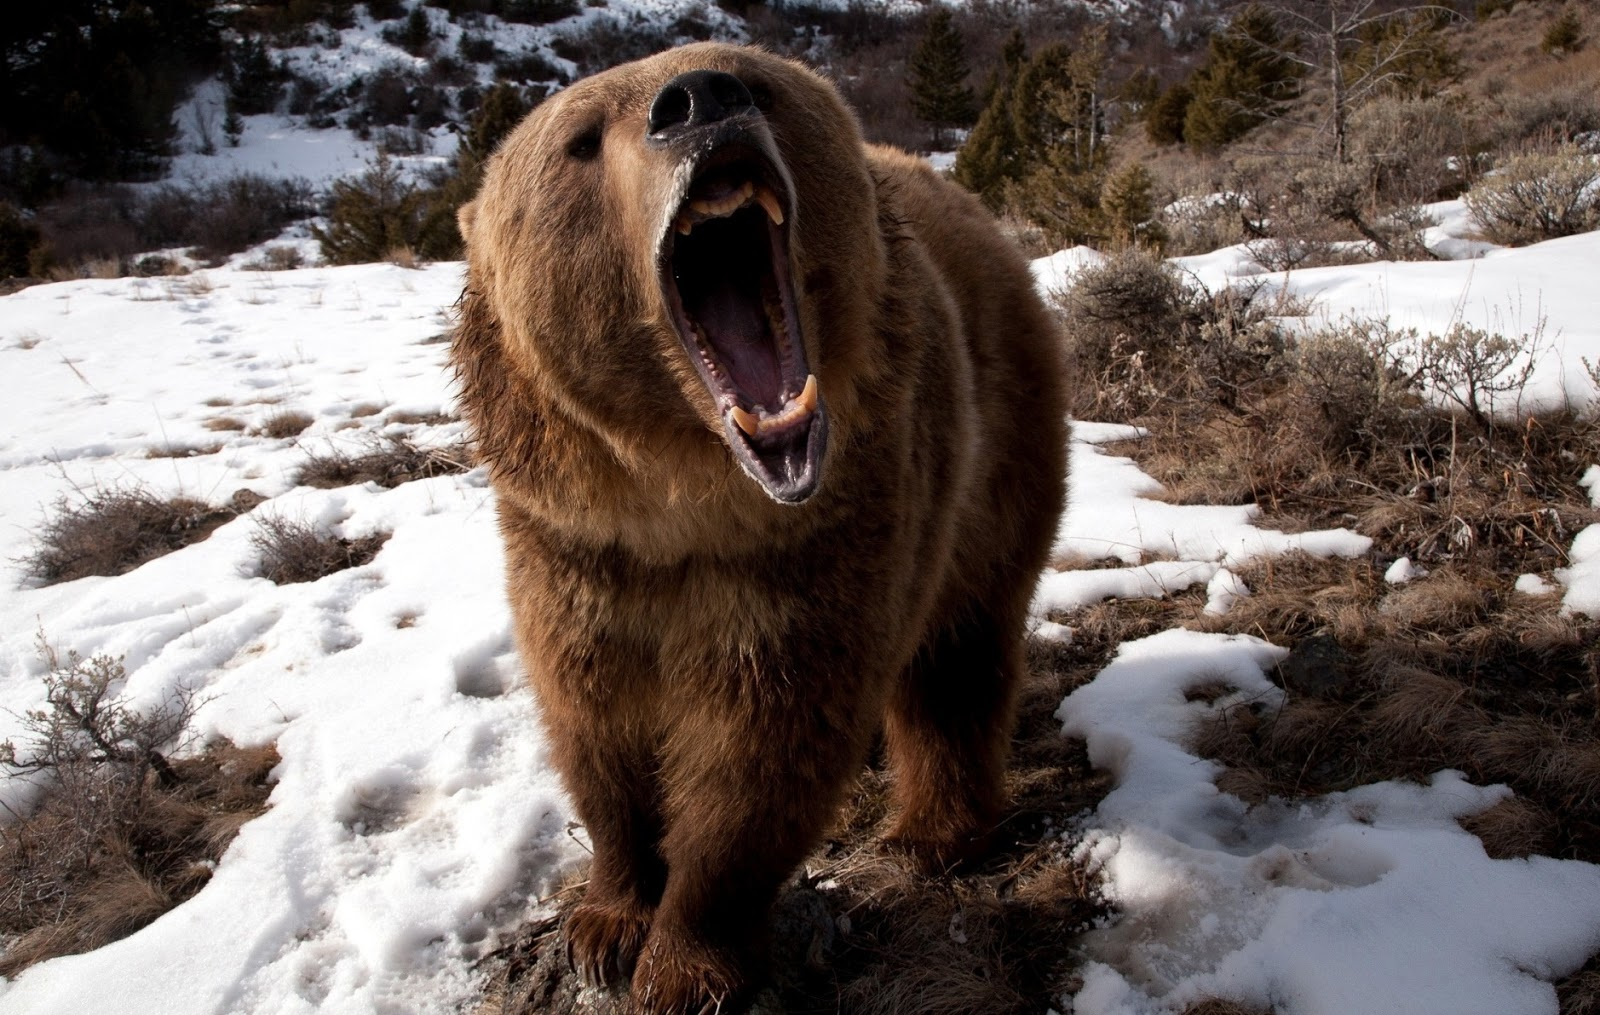

In [34]:
img = cv2.imread(f"{directory}/grizzly bear/Image_4.jpg")
cv2_imshow(img)

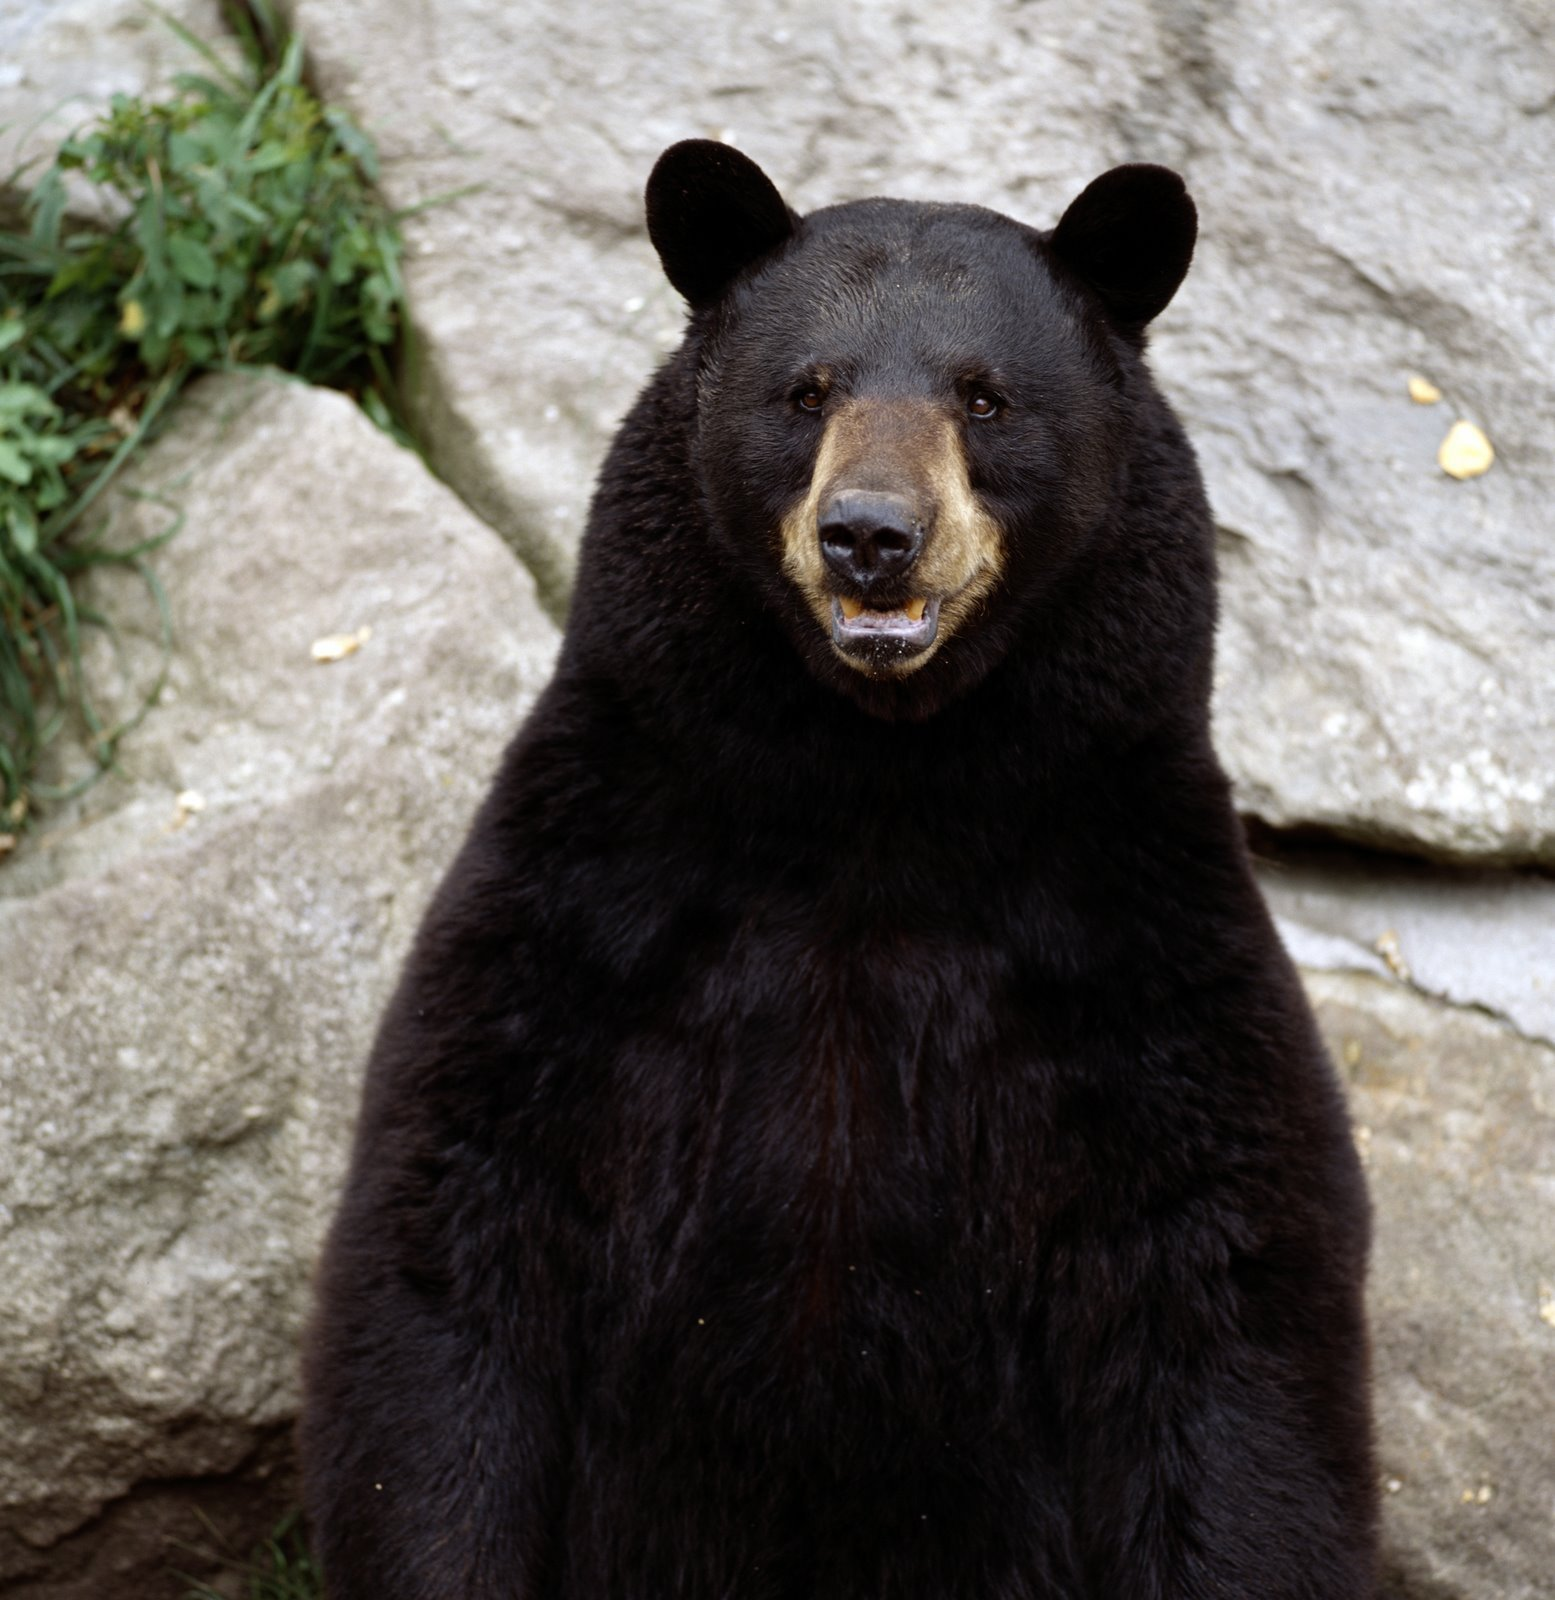

In [35]:
img = cv2.imread(f"{directory}/black bear/Image_2.jpg")
cv2_imshow(img)

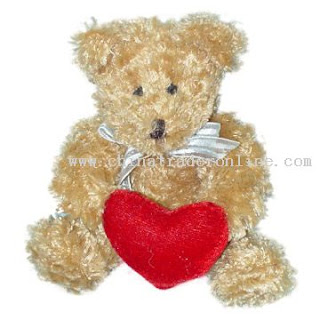

In [36]:
img = cv2.imread(f"{directory}/teddy bear/Image_11.jpg")
cv2_imshow(img)

## DataLoaders

In [37]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [38]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

- blocks=(ImageBlock, CategoryBlock):
    - The independent variable is the thing we are using to make predictions from, and the dependent variable is our target.
    - In this case, the independent variable is a set of images, and the dependent variable are the categories (type of bear) for each image.
- get_items=get_image_files:
    - Takes a path and returns a list of all of the images in that path.
- parent_label:
    - Gets the name of the folder a file is in.

In [39]:
path = directory
dls = bears.dataloaders(path)

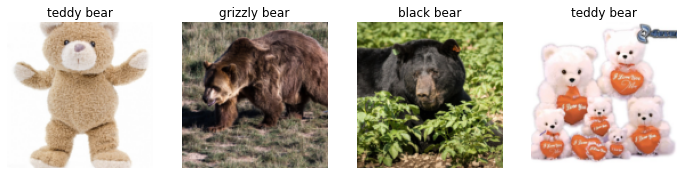

In [40]:
dls.valid.show_batch(max_n=4, nrows=1)

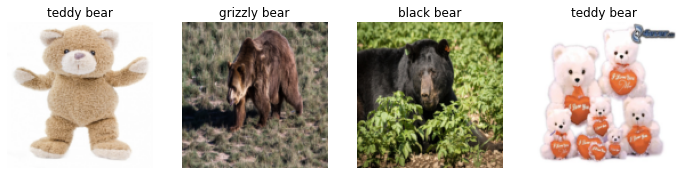

In [41]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

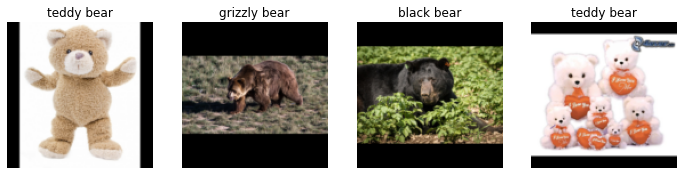

In [42]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

- Based on these two aproaches, the AI can lose information or waste computational resources;
- The solution is to randomly select different parts of each image;
- Training with examples of images in which the objects are in slightly different places and are slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image.

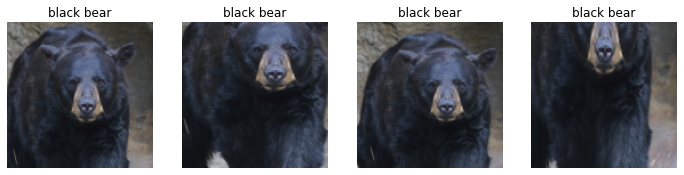

In [43]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

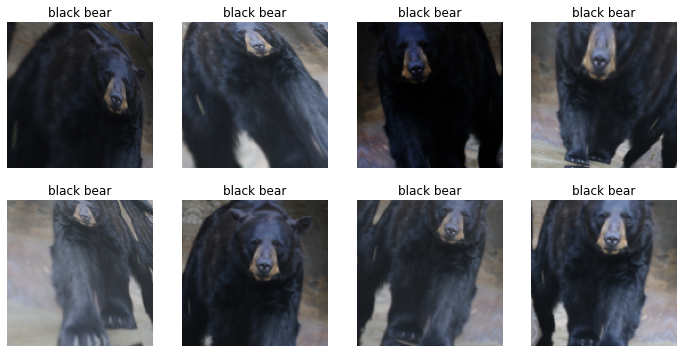

In [44]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training the Model

In [45]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

In [46]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


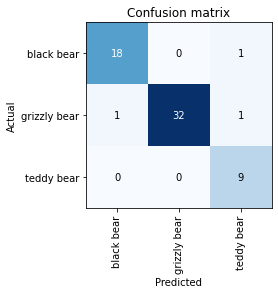

In [47]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

- The diagonal of the matrix shows the images that were classified correctly;
- The off-diagonal cells represent those that were classified incorreclty.

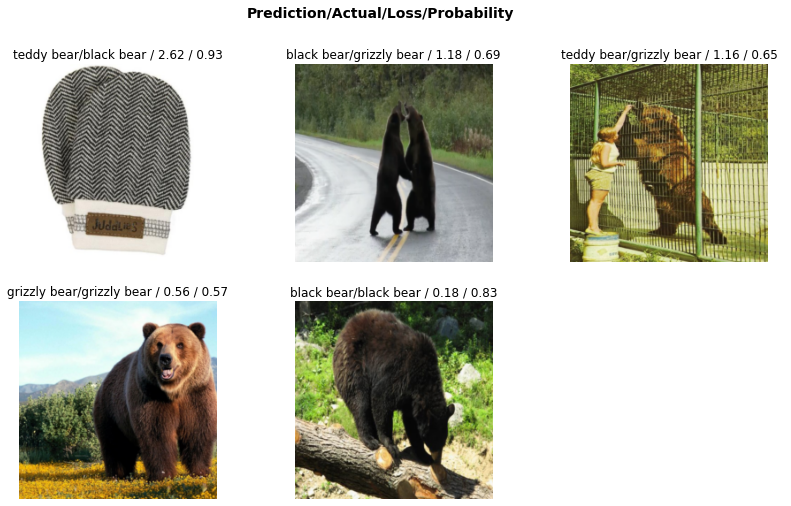

In [48]:
interp.plot_top_losses(5, nrows=2, figsize=(14, 8))

## GUI for Data Cleaning

In [49]:
# cleaner = ImageClassifierCleaner(learn)
# print(cleaner)

# # To delete (unlink) all images selected for deletion, we would run this:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()

# # To move images for which we’ve selected a different category, we would run this:

# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Exporting the Model

In [50]:
learn.export()

## Loading the Model

In [51]:
learn_inf = load_learner('export.pkl')

In [52]:
path_test = '/content/drive/MyDrive/Colab Notebooks/Dados/test_bear'

In [53]:
learn_inf.predict(f'{path_test}/grizzlyBearTest.jpeg')

('grizzly bear',
 TensorBase(1),
 TensorBase([3.2533e-04, 9.9914e-01, 5.3859e-04]))

- It returns the Probability TensorBase[('black', 'grizzly', 'teddy')]

In [54]:
learn_inf.dls.vocab

['black bear', 'grizzly bear', 'teddy bear']

## IPython Widgets

In [55]:
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 33.7 MB/s 


In [59]:
import ipywidgets as widgets

In [60]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

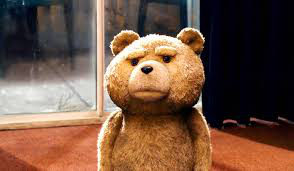

In [74]:
# For this one to work, you must upload an image
img = PILImage.create(btn_upload.data[-1])
img

In [75]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

Output()

In [76]:
pred, pred_idx, probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy bear; Probability: 0.9999')

In [77]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [78]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128, 128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [79]:
widgets.VBox([widgets.Label("Select your Bear!"),
     btn_upload, btn_run, out_pl, lbl_pred])